In [6]:
from Functions import get_processed_data
from sklearn.decomposition import PCA
from Functions import make_pca_agg_fit,add_pca_and_graph, prep_data_splits,size_clusters,anaylsis
import torch 
import os
from transfer_learning import MyDataset,NeuralNet_sherpa_optimize
import torch.nn as nn
import torch.optim as optim
from ignite.engine import Engine,Events
import time 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from Functions import Transfer_graphs,preformance_graph_and_prep_2nd_set,create_std_matrix,unpack_dic,create_dictionaries,make_distance_graph

In [7]:
import json
name="GC_CH4_base_H2_243_task"+".json"
with open(name, 'r') as f: 
  meta = json.load(f)
#needed from base file
epoch_conversions=[431, 431, 431, 431, 431, 431] #specify by orginal file
#Gc Clusters
#[431, 1208, 2727, 3812, 3455, 1873]
#resize
#topology
#[561, 561, 561, 561]
#GC
#[431, 431, 431, 431, 431, 431]

byte=268  #general number for 5 features
resolution=100
epochs=500 
#getting data files
processed=get_processed_data()
g_comp=6
var=.9
#this code should not matter
interest=["H2@100 bar/243K (wt%)"]
interest2 = ['H2@100 bar/77K (wt%)']
#make PCA to run )
#Make PCA on data and generate 
pc1,pc2,color=make_pca_agg_fit(1,processed,var,g_comp,array_out=True,loud=False)
#get unprocessed data
data=get_processed_data(unprocessed=True)
pca_df=add_pca_and_graph(processed,pc1,pc2,color,graph=False)
#puts in old data needed, but can't be processed in PCA
pca_df[['MOF ID',interest[0],interest2[0],'topology']]=data[['MOF ID',interest[0],interest2[0],'topology']]

#removes some unneeded columns
abridge=pca_df[['MOF ID', 'void fraction', 'Vol. S.A.', 'Grav. S.A.','Pore diameter Limiting', 'Pore diameter Largest',interest[0],interest2[0],'topology', 'Pc1', 'Pc2', 'Cluster']]

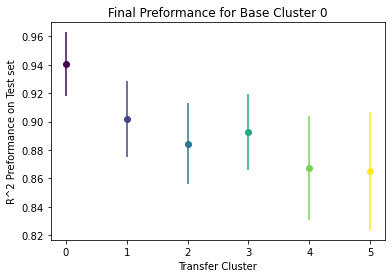

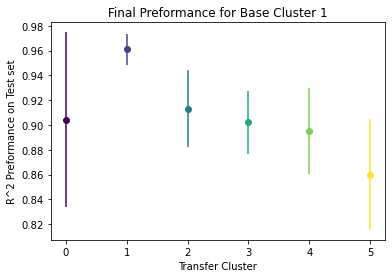

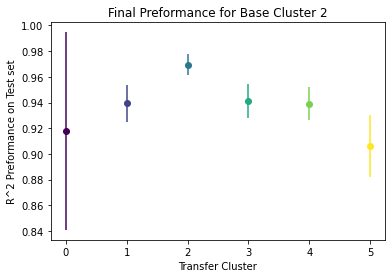

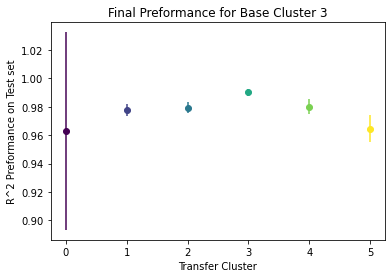

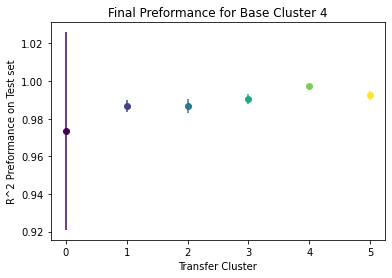

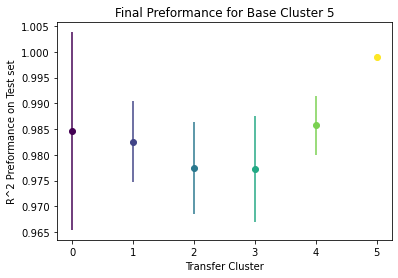

index -1 is out of bounds for axis 0 with size 0
error (0, 0)
integral,std_int,+1_std,normal
3.3635116018384856 4.454808223556043 41.323232323232325 31.242424242424242
integral,std_int,+1_std,normal
50.962920362794215 42.93582505486804 157.25252525252526 132.05050505050505
integral,std_int,+1_std,normal
197.8248718347242 4860.763550010477 192.53535353535355 167.33333333333334
integral,std_int,+1_std,normal
536.3911169372824 7113.54205086982 323.5858585858586 278.22222222222223
integral,std_int,+1_std,normal
276.7796821117154 3940.396599215157 303.42424242424244 263.1010101010101


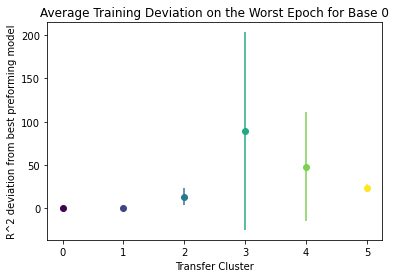

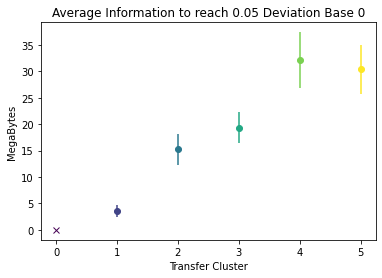

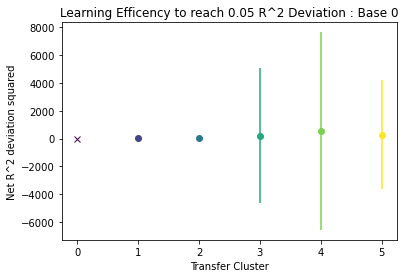

integral,std_int,+1_std,normal
11.053618333364678 28.858918432024016 137.0909090909091 76.60606060606061
index -1 is out of bounds for axis 0 with size 0
error (1, 1)
integral,std_int,+1_std,normal
6.456063204280249 7.6504470437168015 66.52525252525253 46.36363636363637
integral,std_int,+1_std,normal
115.00620977691466 79.17199908459472 142.13131313131314 111.8888888888889
integral,std_int,+1_std,normal
207.62196608895124 1572.1058076863444 167.33333333333334 152.21212121212122
integral,std_int,+1_std,normal
333.5166524488313 16792.75369020996 242.93939393939394 207.65656565656568


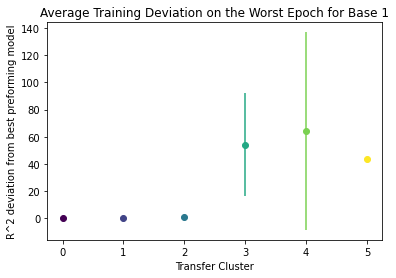

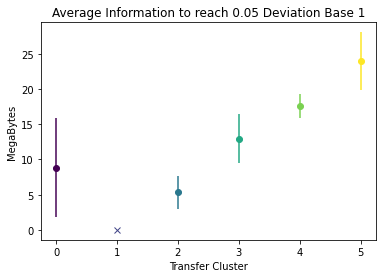

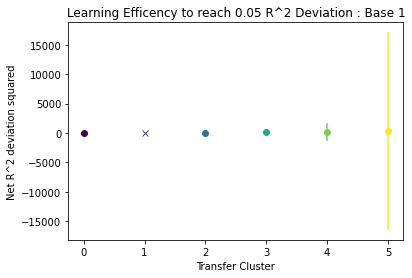

integral,std_int,+1_std,normal
22.665459404875783 32.53364202858533 157.25252525252526 132.05050505050505
integral,std_int,+1_std,normal
2.0202631869393475 2.6571583575311335 41.323232323232325 26.202020202020204
index -1 is out of bounds for axis 0 with size 0
error (2, 2)
integral,std_int,+1_std,normal
0.5416486642916207 1.33707096413479 16.12121212121212 11.080808080808081
integral,std_int,+1_std,normal
77.69051938806169 504.8394815852712 71.56565656565657 56.44444444444445
integral,std_int,+1_std,normal
70.12058992192502 52.24633011426096 308.4646464646465 263.1010101010101


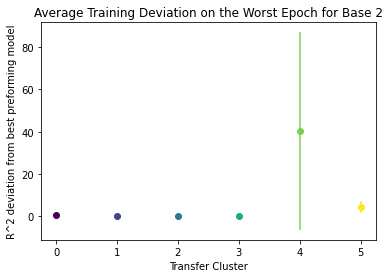

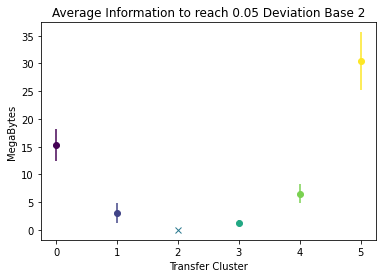

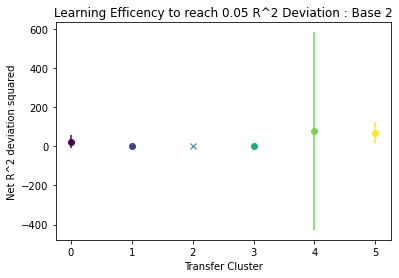

integral,std_int,+1_std,normal
23.331521125423325 35.75890347053307 182.45454545454547 127.01010101010101
integral,std_int,+1_std,normal
2.9262238994732255 2.2518718306817775 46.36363636363637 31.242424242424242
integral,std_int,+1_std,normal
0.0 0.6317628815076757 11.080808080808081 6.040404040404041
index -1 is out of bounds for axis 0 with size 0
error (3, 3)
integral,std_int,+1_std,normal
8.461838445249539 5.1793037001384405 51.40404040404041 31.242424242424242
integral,std_int,+1_std,normal
39.89700927144918 22.811736348872202 258.06060606060606 212.69696969696972


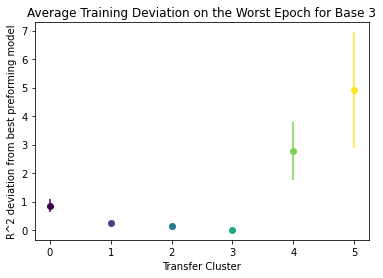

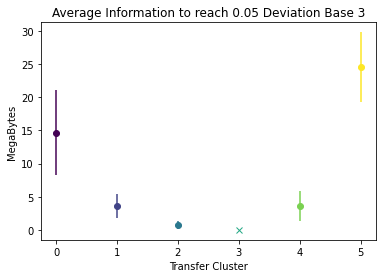

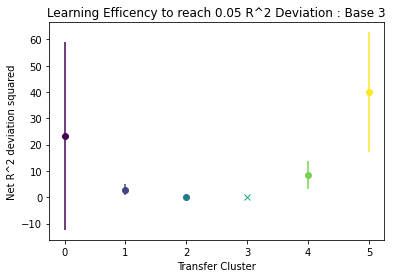

integral,std_int,+1_std,normal
27.95054847974568 34.87622459687992 192.53535353535355 127.01010101010101
integral,std_int,+1_std,normal
6.617331610998332 3.043581226735877 51.40404040404041 36.282828282828284
integral,std_int,+1_std,normal
2.8668446730138517 1.3961116056587595 26.202020202020204 21.161616161616163
integral,std_int,+1_std,normal
1.6478992997147415 0.7666897138173467 21.161616161616163 16.12121212121212
index -1 is out of bounds for axis 0 with size 0
error (4, 4)
integral,std_int,+1_std,normal
8.268194703355615 4.513792143511823 96.76767676767678 76.60606060606061


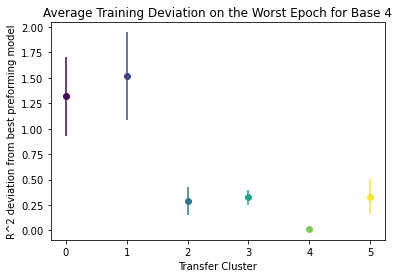

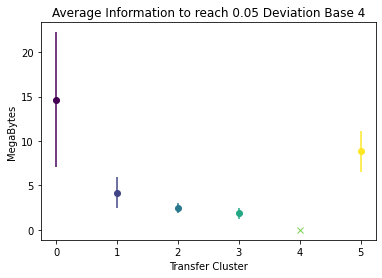

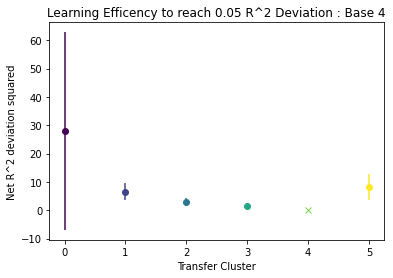

integral,std_int,+1_std,normal
13.257739423550115 7.315086432797328 71.56565656565657 56.44444444444445
integral,std_int,+1_std,normal
11.223883965580281 6.330963065833114 71.56565656565657 46.36363636363637
integral,std_int,+1_std,normal
15.045936437683071 9.583500336598679 111.8888888888889 81.64646464646465
integral,std_int,+1_std,normal
8.146977833980152 5.84500000497907 86.68686868686869 61.484848484848484
integral,std_int,+1_std,normal
2.1434045344763883 2.448505442066773 46.36363636363637 26.202020202020204
index -1 is out of bounds for axis 0 with size 0
error (5, 5)


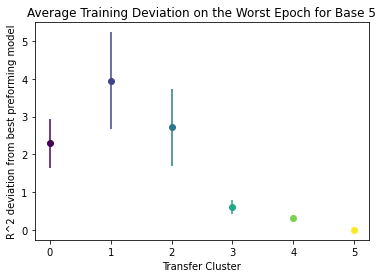

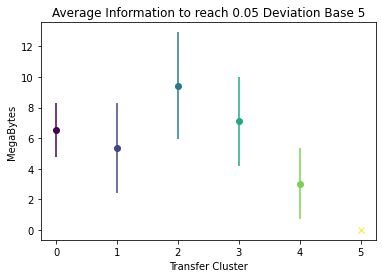

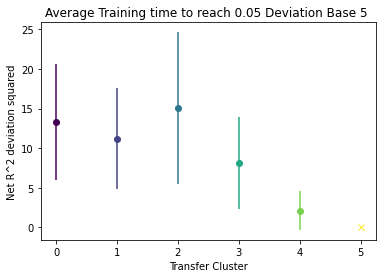

,Pc1,Pc2
Cluster,,
0,-3.544039,3.418156
1,-2.759969,0.638465
2,-1.570916,-0.855064
3,-0.129714,-0.473748
4,1.291237,-0.044567
5,2.664458,0.756521


c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:278: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


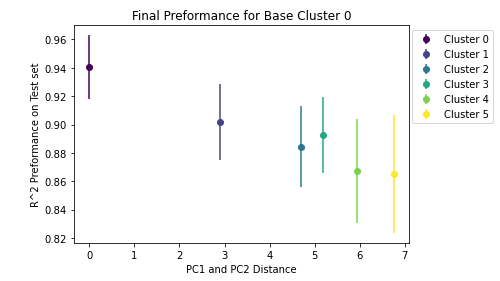

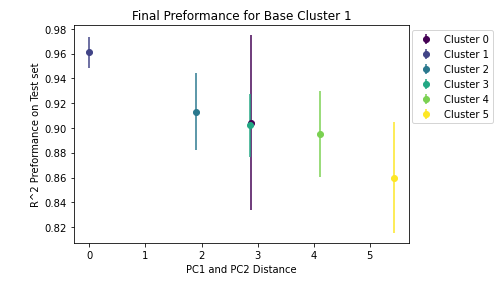

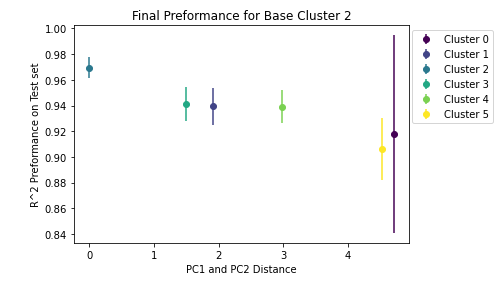

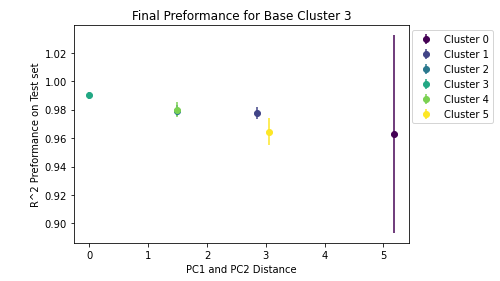

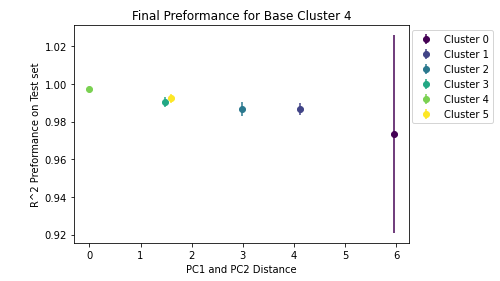

c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:307: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


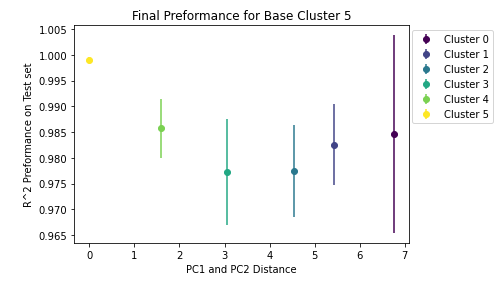

,Pc1
Cluster,
0,-3.544039
1,-2.759969
2,-1.570916
3,-0.129714
4,1.291237
5,2.664458


c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:278: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


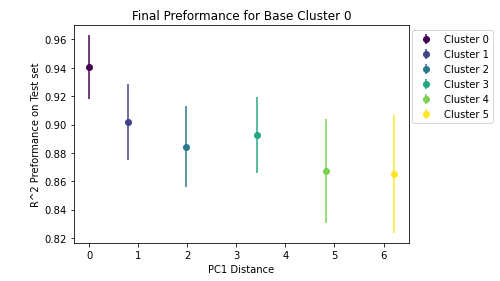

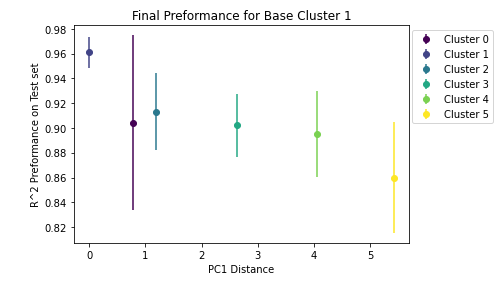

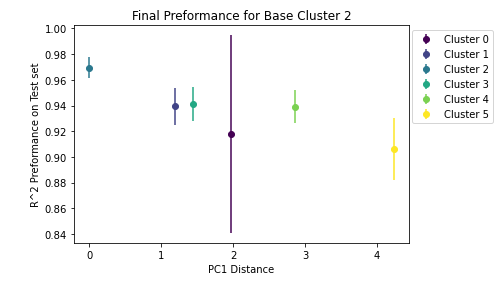

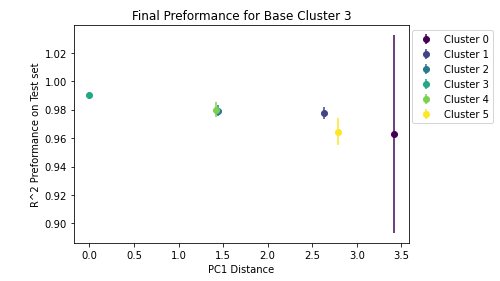

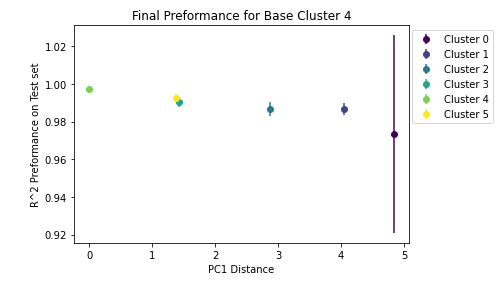

c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:307: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


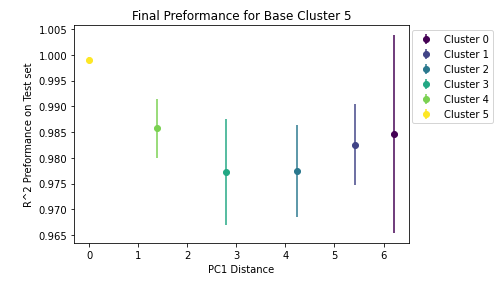

,Pc2
Cluster,
0,3.418156
1,0.638465
2,-0.855064
3,-0.473748
4,-0.044567
5,0.756521


c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:278: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


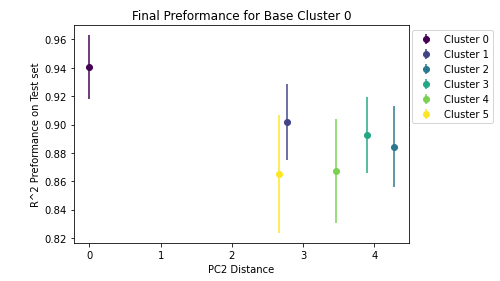

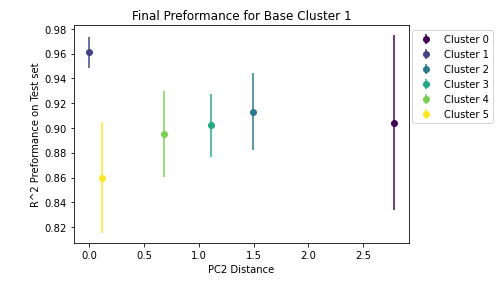

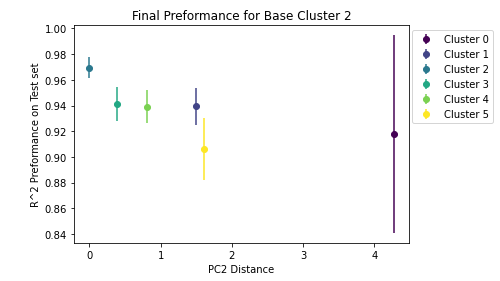

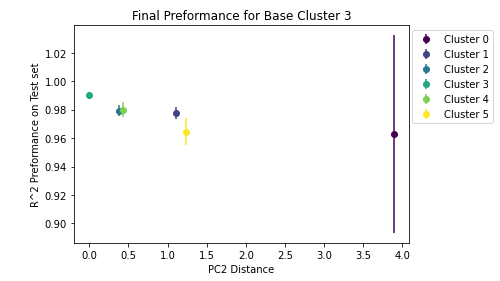

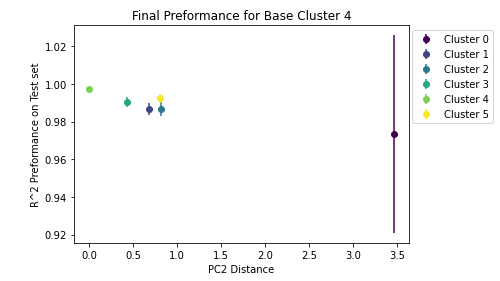

c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:307: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


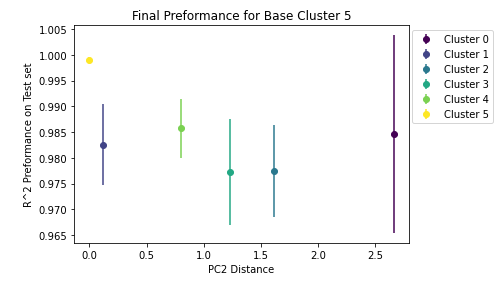

In [8]:
Cluster_colors=[
[0.267004, 0.004874, 0.329415, 1.      ],
[0.253935, 0.265254, 0.529983, 1.      ],
[0.163625, 0.471133, 0.558148, 1.      ],
[0.134692, 0.658636, 0.517649, 1.      ],
[0.477504, 0.821444, 0.318195, 1.      ],
[0.993248, 0.906157, 0.143936, 1.      ],]
dic,dic2,std=create_dictionaries(g_comp)
dic=unpack_dic(dic,meta)
std=create_std_matrix(dic,std)
dic2=preformance_graph_and_prep_2nd_set(Cluster_colors,dic,dic2,adjust=100,save=True)
Transfer_graphs(dic2,resolution,epoch_conversions,Cluster_colors,byte,std,epochs,save=True)
import pandas as pd
from scipy.spatial import distance_matrix
hold=pd.DataFrame()
hold[['Pc1', 'Pc2',"Cluster"]]=abridge[['Pc1', 'Pc2',"Cluster"]]
display(hold.groupby("Cluster").median())
distances=distance_matrix(hold.groupby("Cluster").median(),hold.groupby("Cluster").median())
make_distance_graph(dic,distances,Cluster_colors,"PC1 and PC2",save=True)
hold=pd.DataFrame()
hold[['Pc1',"Cluster"]]=abridge[['Pc1',"Cluster"]]
display(hold.groupby("Cluster").median())
distances=distance_matrix(hold.groupby("Cluster").median(),hold.groupby("Cluster").median())
make_distance_graph(dic,distances,Cluster_colors,"PC1",save=True)
hold=pd.DataFrame()
hold[['Pc2',"Cluster"]]=abridge[['Pc2',"Cluster"]]
display(hold.groupby("Cluster").median())
distances=distance_matrix(hold.groupby("Cluster").median(),hold.groupby("Cluster").median())
make_distance_graph(dic,distances,Cluster_colors,"PC2",save=True)

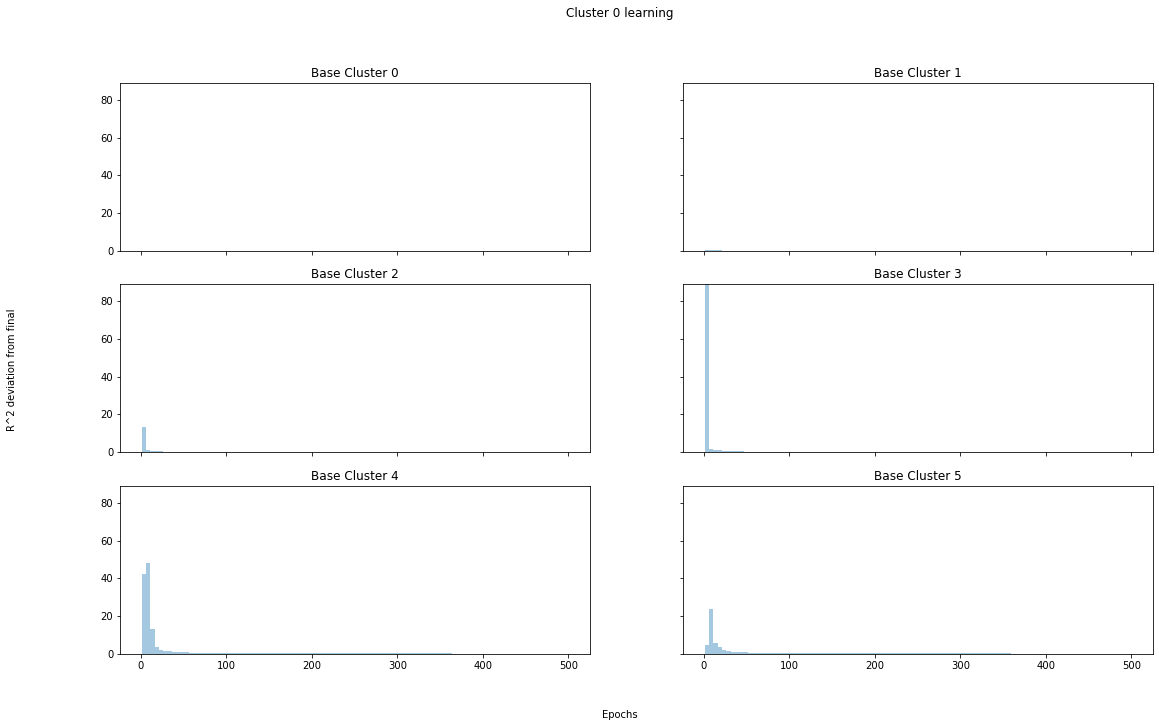

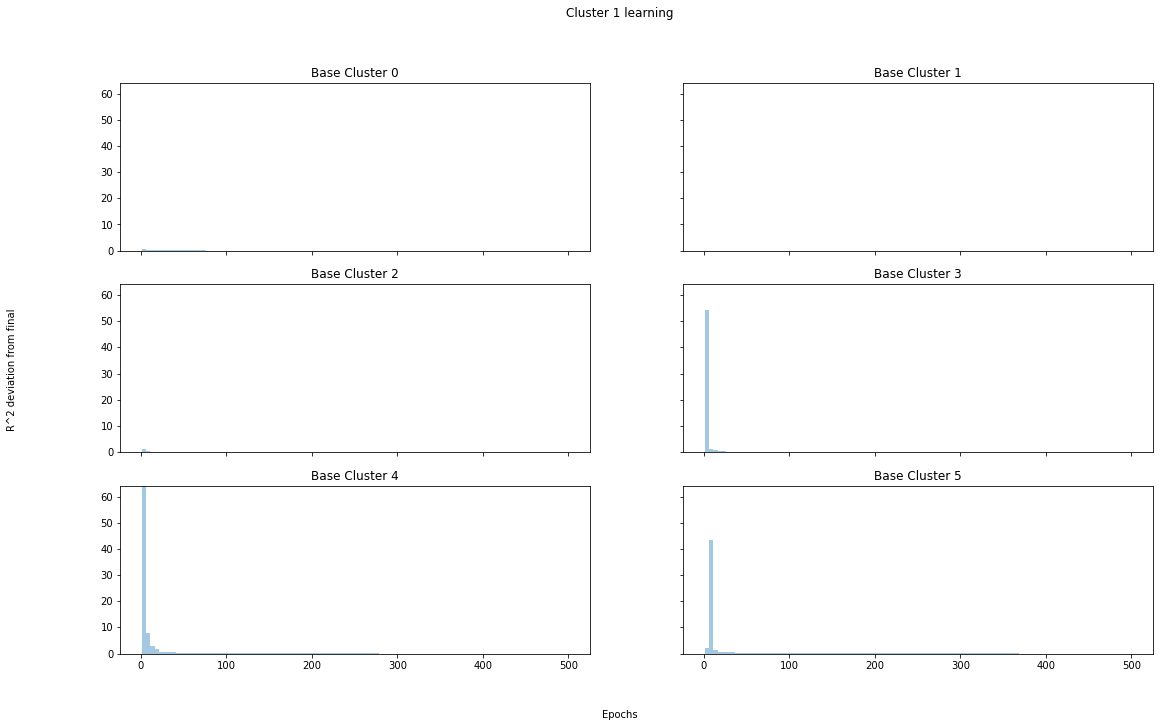

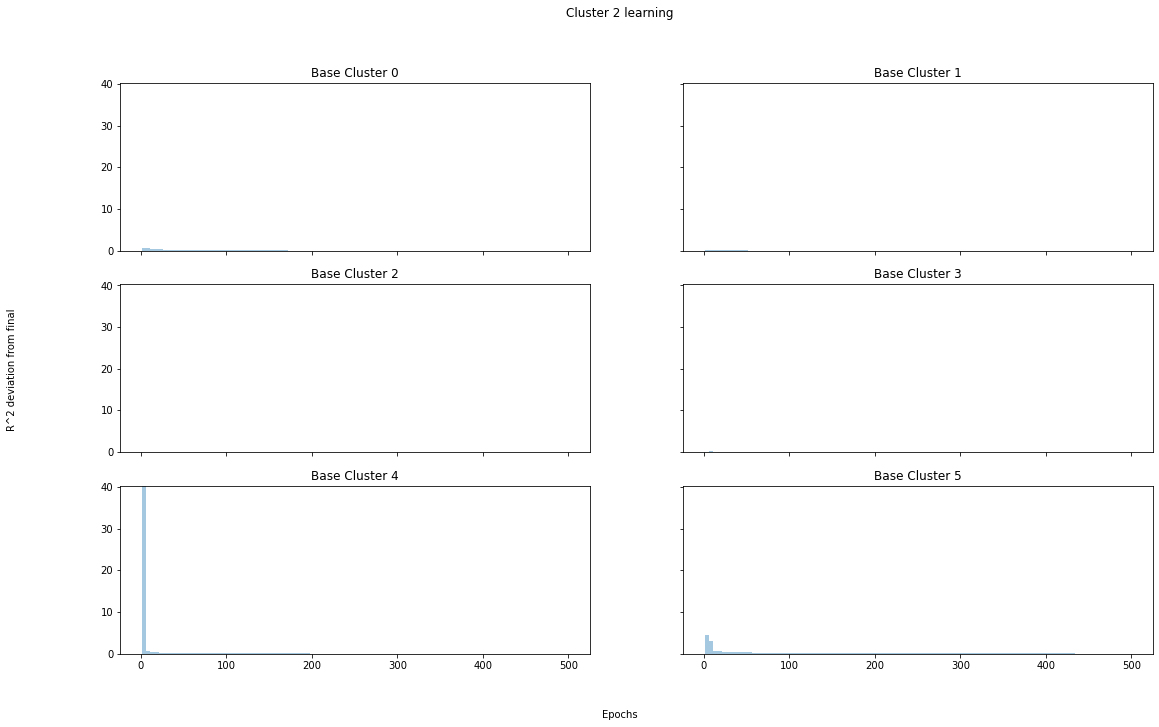

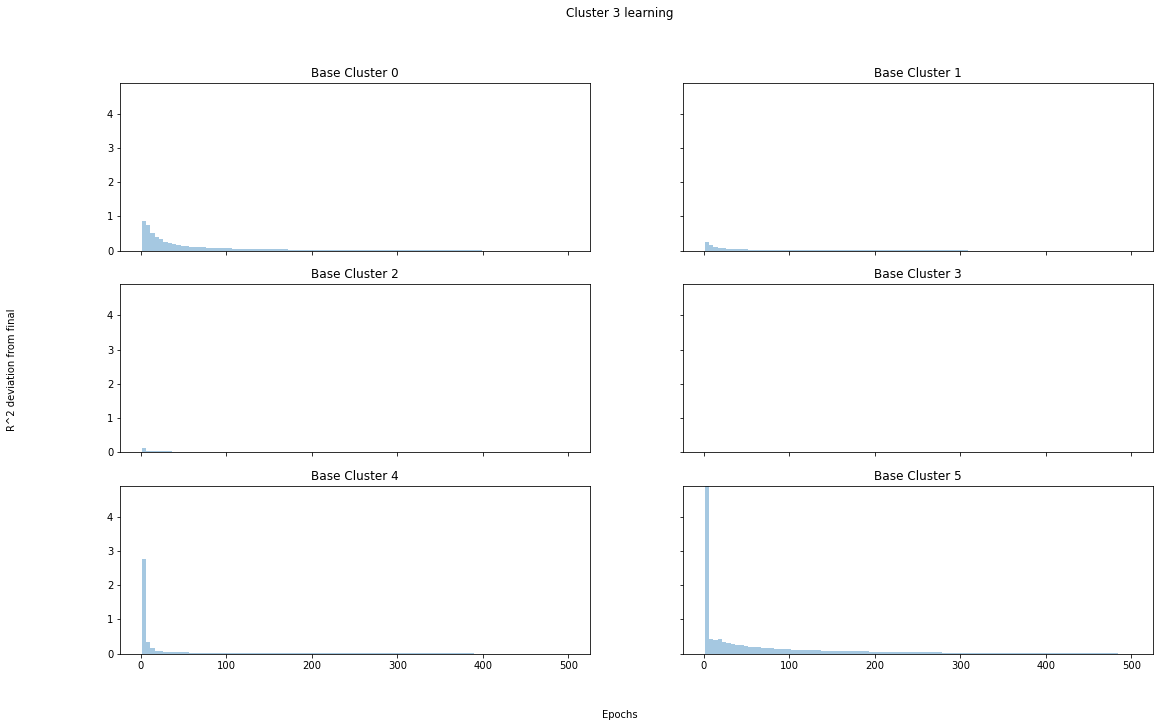

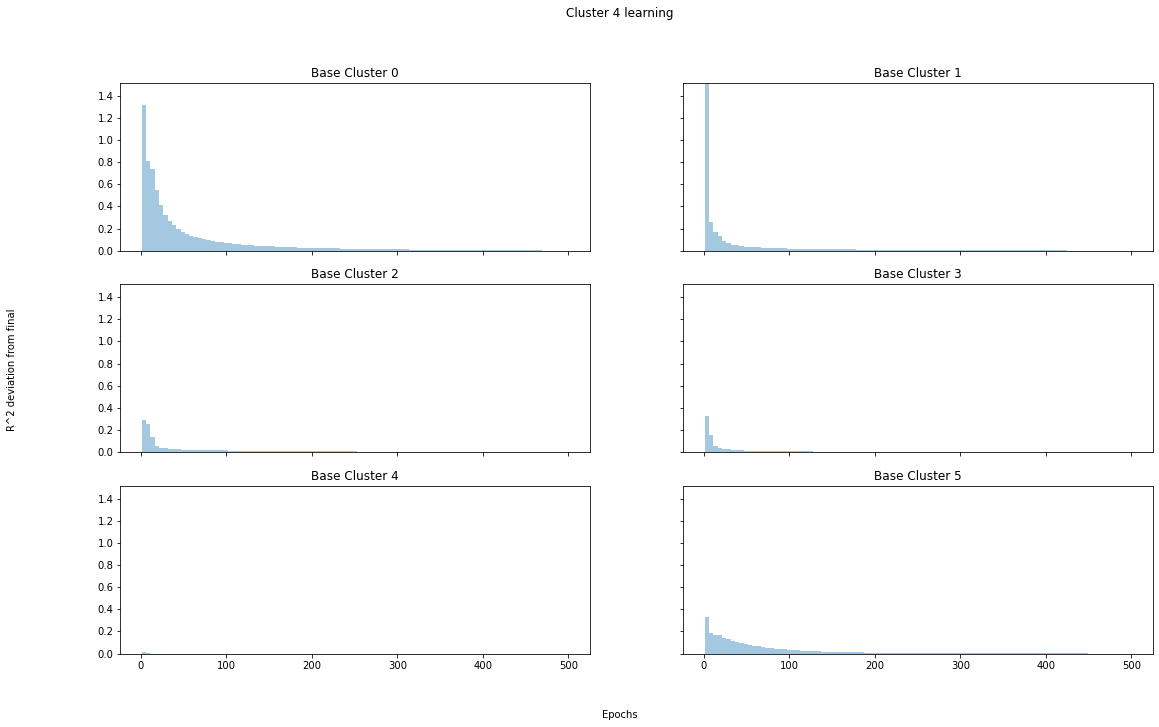

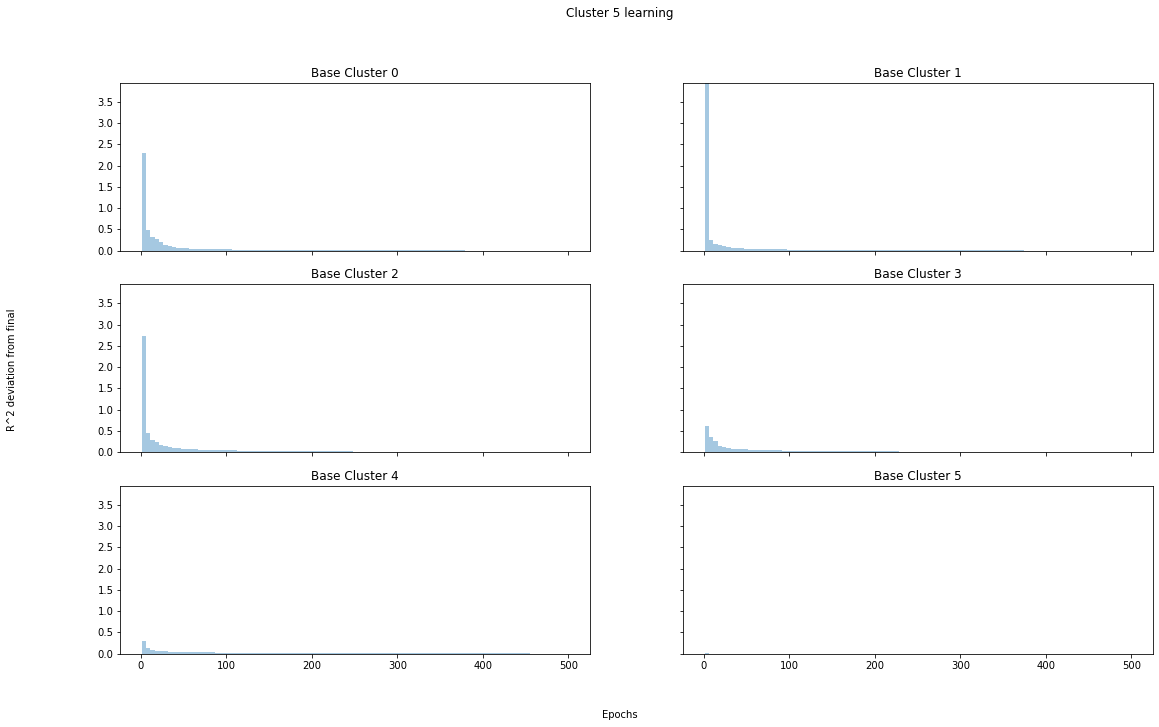

In [9]:
import numpy as np
base={}
std={}
for count,i in enumerate((meta[0])):
    i=meta[0][i]
    base[count]=(i)
for i in meta[1:]:
    for g in i:
        for count,z in enumerate(i[g]):
            base[int(g)][count]=np.array(base[int(g)][count])+np.array(z)
anaylsis(base,adjust=100)

In [10]:
#packages pngs
import os
folder=name[:-5]
os.mkdir(folder)
path=os.getcwd()
for i in os.listdir(path):
    if (i[-3:]) == "png":
        os.rename(f"{path}/{i}",f"{path}/{folder}/{i}")
    else: 
        pass